# Team AIBaas

CNN Main Notebook 
Authors :
Ilukkumbura IMEIB
Nadha 
Boralugoda

In [1]:
!pip install pip install tensorflow keras matplotlib scikit-learn


ERROR: Could not find a version that satisfies the requirement install (from versions: none)

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for install


In [ ]:
from pathlib import Path
root = Path(r"E:\SEM5\PR\CNN\CNN\Dataset\Jute_Pest_Dataset")

# Print immediate children
print("Top-level folders/files:")
for p in sorted(root.iterdir()):
    print(" ", p.name)

# Find class folders in case dataset already splitted
def find_class_dirs(base):
    classes = []
    for p in base.iterdir():
        if p.is_dir():
            # heuristics: folder contains many image files
            img_count = len(list(p.glob("*.jpg"))) + len(list(p.glob("*.png")))
            if img_count > 0:
                classes.append((p.name, img_count))
    return classes

print("\nClass folders at root (name, count):")
print(find_class_dirs(root))

# Also check train/val/test subdirs
for split in ["train","val","test"]:
    s = root / split
    if s.exists():
        print(f"\nFound {split} folder with class counts:")
        print(find_class_dirs(s))


Top-level folders/files:
  test
  train
  val

Class folders at root (name, count):
[]

Found train folder with class counts:
[('Beet Armyworm', 199), ('Black Hairy', 309), ('Cutworm', 399), ('Field Cricket', 392), ('Jute Aphid', 530), ('Jute Hairy', 414), ('Jute Red Mite', 457), ('Jute Semilooper', 372), ('Jute Stem Girdler', 281), ('Jute Stem Weevil', 676), ('Leaf Beetle', 297), ('Mealybug', 466), ('Pod Borer', 384), ('Scopula Emissaria', 320), ('Termite', 291), ('Termite odontotermes (Rambur)', 301), ('Yellow Mite', 342)]

Found val folder with class counts:
[('Beet Armyworm', 40), ('Black Hairy', 30), ('Cutworm', 18), ('Field Cricket', 14), ('Jute Aphid', 27), ('Jute Hairy', 8), ('Jute Red Mite', 49), ('Jute Semilooper', 3), ('Jute Stem Girdler', 6), ('Jute Stem Weevil', 71), ('Leaf Beetle', 6), ('Mealybug', 35), ('Pod Borer', 3), ('Scopula Emissaria', 5), ('Termite', 26), ('Termite odontotermes (Rambur)', 36), ('Yellow Mite', 30)]

Found test folder with class counts:
[('Beet Army

In [1]:
import tensorflow as tf

In [2]:
directory = r"E:\SEM5\PR\CNN\CNN\Dataset\Jute_Pest_Dataset\train"
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory,
    image_size=(128, 128),  # keep small for now
    batch_size=32
)
train_raw = tf.keras.utils.image_dataset_from_directory(
    directory,
    image_size=(128, 128),  # keep small for now
    batch_size=32
)
directory = r"E:\SEM5\PR\CNN\CNN\Dataset\Jute_Pest_Dataset\val"
val_ds = tf.keras.utils.image_dataset_from_directory(
    directory,
    image_size=(128, 128),  # keep small for now
    batch_size=32
)
directory = r"E:\SEM5\PR\CNN\CNN\Dataset\Jute_Pest_Dataset\test"
test_ds = tf.keras.utils.image_dataset_from_directory(
    directory,
    image_size=(128, 128),  # keep small for now
    batch_size=32
)

# Normalize pixel values from [0,255] → [0,1]
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)


Found 6443 files belonging to 17 classes.
Found 6443 files belonging to 17 classes.
Found 413 files belonging to 17 classes.
Found 379 files belonging to 17 classes.


In [3]:
from tensorflow import keras
from tensorflow.keras import layers, models

num_classes = len(train_raw.class_names)

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),

    layers.Dense(num_classes, activation='softmax')
])


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 17)             │         2,193 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,394,513 (28.21 MB)

 Trainable params: 7,394,513 (28.21 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.compile(
    optimizer='adam',                         # we’ll discuss this choice later for your report
    loss='sparse_categorical_crossentropy',   # since labels are integer IDs
    metrics=['accuracy']
)


In [6]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20
)


Epoch 1/20


KeyboardInterrupt: 

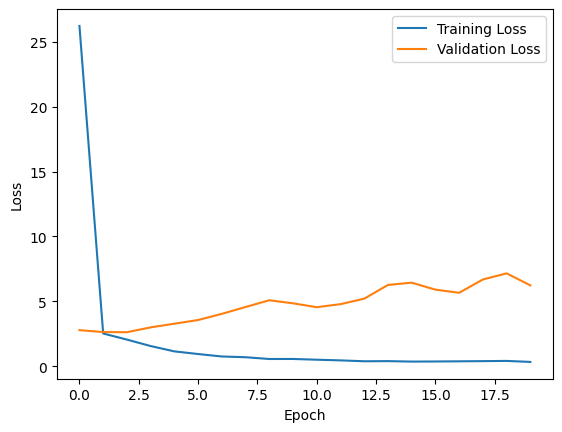

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

test_loss, test_acc = model.evaluate(test_ds)
print("Test Accuracy:", test_acc)


import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Gather all predictions and true labels
y_true = np.concatenate([y for x, y in test_ds], axis=0)
y_pred = np.concatenate([np.argmax(model.predict(x), axis=1) for x, y in test_ds], axis=0)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

# Precision, Recall, F1
print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=test_ds.class_names))



12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - accuracy: 0.2518 - loss: 6.9610
Test Accuracy: 0.24802111089229584


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Confusion Matrix:
 [[0 1 0 1 2 0 2 3 1 2 3 2 0 0 0 1 2]
 [0 0 2 1 1 0 4 2 1 1 0 3 0 0 1 2 2]
 [0 1 0 1 2 4 2 2 0 2 1 2 0 2 0 1 0]
 [0 2 0 2 3 1 0 1 3 2 1 3 0 0 0 1 1]
 [1 0 2 3 2 2 0 2 3 0 2 2 0 0 0 2 1]
 [0 1 0 1 2 3 1 0 2 5 0 1 1 1 1 1 0]
 [0 0 2 1 8 1 0 1 1 4 2 3 1 0 0 0 0]
 [0 0 2 0 2 3 2 2 2 3 0 2 0 0 0 2 1]
 [0 0 1 0 6 0 3 1 1 3 2 0 1 2 1 0 3]
 [0 2 0 3 2 3 1 1 1 5 0 1 0 1 2 0 2]
 [0 0 2 0 4 2 1 2 3 4 1 2 0 1 1 1 0]
 [1 0 2 1 2 0 3 4 0 6 2 2 0 1 0 0 0]
 [0 0 1 3 3 1 3 2 2 1 1 2 0 2 0 2 1]
 [0 1 2 3 5 2 3 2 1 1 0 1 0 0 1 0 2]
 [0 1 

In [ ]:
directory = r"E:\SEM5\PR\CNN\CNN\Dataset\Jute_Pest_Dataset\train"
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory,
    image_size=(128, 128),  # keep small for now
    batch_size=32
)
train_raw = tf.keras.utils.image_dataset_from_directory(
    directory,
    image_size=(128, 128),  # keep small for now
    batch_size=32
)
directory = r"E:\SEM5\PR\CNN\CNN\Dataset\Jute_Pest_Dataset\val"
val_ds = tf.keras.utils.image_dataset_from_directory(
    directory,
    image_size=(128, 128),  # keep small for now
    batch_size=32
)
directory = r"E:\SEM5\PR\CNN\CNN\Dataset\Jute_Pest_Dataset\test"
test_ds = tf.keras.utils.image_dataset_from_directory(
    directory,
    image_size=(128, 128),  # keep small for now
    batch_size=32
)
test_raw = tf.keras.utils.image_dataset_from_directory(
    directory,
    image_size=(128, 128),  # keep small for now
    batch_size=32
)

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
])

train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))



# Normalize pixel values from [0,255] → [0,1]
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)


Found 6443 files belonging to 17 classes.
Found 6443 files belonging to 17 classes.
Found 413 files belonging to 17 classes.
Found 379 files belonging to 17 classes.
Found 379 files belonging to 17 classes.


In [ ]:
model2 = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(num_classes, activation='softmax')
])

model2.compile(
    optimizer='adam',                         # we’ll discuss this choice later for your report
    loss='sparse_categorical_crossentropy',   # since labels are integer IDs
    metrics=['accuracy']
)


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model2.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20
)


Epoch 1/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 56s 196ms/step - accuracy: 0.0858 - loss: 2.7971 - val_accuracy: 0.3027 - val_loss: 2.5370
Epoch 2/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 49s 244ms/step - accuracy: 0.1781 - loss: 2.5602 - val_accuracy: 0.3850 - val_loss: 2.2065
Epoch 3/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 41s 202ms/step - accuracy: 0.2454 - loss: 2.3186 - val_accuracy: 0.4431 - val_loss: 2.0355
Epoch 4/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 41s 205ms/step - accuracy: 0.2875 - loss: 2.1820 - val_accuracy: 0.4649 - val_loss: 1.9711
Epoch 5/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 46s 228ms/step - accuracy: 0.3133 - loss: 2.0700 - val_accuracy: 0.4504 - val_loss: 1.9649
Epoch 6/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 44s 218ms/step - accuracy: 0.3524 - loss: 1.9468 - val_accuracy: 0.4843 - val_loss: 1.8214
Epoch 7/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 43s 214ms/step - accuracy: 0.3719 - loss: 1.8422 - val_accuracy: 0.4964 - val_loss: 1.7393
Epoch 8/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 39s 195ms/step - accuracy: 0.3806 - loss: 1

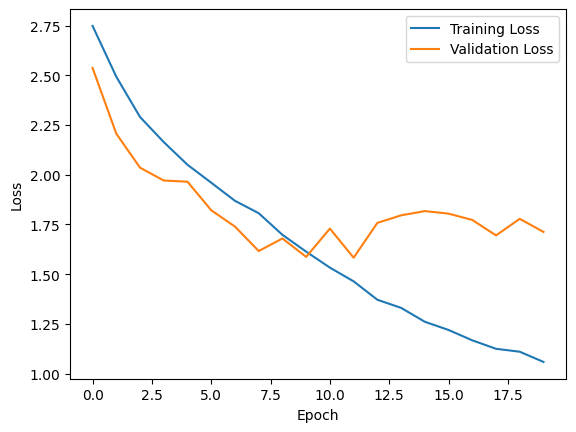

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.0949 - loss: 4.1170
Test Accuracy: 0.09498680382966995
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Confusion Matrix:
 [[ 0  4  3  0  5  0  4  0  0  0  0  4  0  0  0  0  0]
 [ 0  6  3  0  9  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  4  3  0  6  0  2  1  0  0  0  4  0  0  0  0  0]
 [ 0  6  1  0  4  0  8  0  0  0  0  1  0  0  0  0  0]
 [ 0  8  2  0  8  0  0  0  0  0  0  4  0  0  0  0  0]
 [ 0  7  0  0  7  0  6  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  4  0  4  2  8  0  0  0  0  2  0  1  0  0  0]
 [ 0  1  0  0  3  0 17  0  0  0  0  0

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

test_loss, test_acc = model.evaluate(test_ds)
print("Test Accuracy:", test_acc)


import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Gather all predictions and true labels
y_true = np.concatenate([y for x, y in test_ds], axis=0)
y_pred = np.concatenate([np.argmax(model.predict(x), axis=1) for x, y in test_ds], axis=0)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

# Precision, Recall, F1
print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=test_raw.class_names))



In [9]:
directory = r"E:\SEM5\PR\CNN\CNN\Dataset\Jute_Pest_Dataset\train"
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory,
    image_size=(224,224) ,# keep small for now
    batch_size=8
)
train_raw = tf.keras.utils.image_dataset_from_directory(
    directory,
    image_size=(224,224),  # keep small for now
    batch_size=8
)
directory = r"E:\SEM5\PR\CNN\CNN\Dataset\Jute_Pest_Dataset\val"
val_ds = tf.keras.utils.image_dataset_from_directory(
    directory,
    image_size=(224,224),  # keep small for now
    batch_size=8
)
directory = r"E:\SEM5\PR\CNN\CNN\Dataset\Jute_Pest_Dataset\test"
test_ds = tf.keras.utils.image_dataset_from_directory(
    directory,
    image_size=(224,224),  # keep small for now
    batch_size=8
)
test_raw = tf.keras.utils.image_dataset_from_directory(
    directory,
    image_size=(224,224),  # keep small for now
    batch_size=8
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator


data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2)
])

train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))

# Normalize pixel values from [0,255] → [0,1]
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)


Found 6443 files belonging to 17 classes.
Found 6443 files belonging to 17 classes.
Found 413 files belonging to 17 classes.
Found 379 files belonging to 17 classes.
Found 379 files belonging to 17 classes.


In [12]:
from tensorflow.keras import layers, models


model2 = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    layers.MaxPooling2D(2,2),
    layers.BatchNormalization(),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.BatchNormalization(),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.BatchNormalization(),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.BatchNormalization(),

    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(num_classes, activation='softmax')
])

model2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, verbose=1)

history = model2.fit(train_ds, validation_data=val_ds, epochs=30, callbacks=[early_stop, reduce_lr])




Epoch 1/30
806/806 ━━━━━━━━━━━━━━━━━━━━ 265s 267ms/step - accuracy: 0.1437 - loss: 2.7522 - val_accuracy: 0.2155 - val_loss: 2.7435 - learning_rate: 0.0010
Epoch 2/30
806/806 ━━━━━━━━━━━━━━━━━━━━ 296s 367ms/step - accuracy: 0.2222 - loss: 2.4138 - val_accuracy: 0.1937 - val_loss: 2.7290 - learning_rate: 0.0010
Epoch 3/30
806/806 ━━━━━━━━━━━━━━━━━━━━ 312s 388ms/step - accuracy: 0.3150 - loss: 2.1714 - val_accuracy: 0.2785 - val_loss: 2.6706 - learning_rate: 0.0010
Epoch 4/30
806/806 ━━━━━━━━━━━━━━━━━━━━ 302s 375ms/step - accuracy: 0.3601 - loss: 2.0271 - val_accuracy: 0.3462 - val_loss: 2.4653 - learning_rate: 0.0010
Epoch 5/30
806/806 ━━━━━━━━━━━━━━━━━━━━ 291s 362ms/step - accuracy: 0.3868 - loss: 1.9034 - val_accuracy: 0.3850 - val_loss: 2.3847 - learning_rate: 0.0010
Epoch 6/30
211/806 ━━━━━━━━━━━━━━━━━━━━ 3:34 361ms/step - accuracy: 0.4299 - loss: 1.7642

KeyboardInterrupt: 

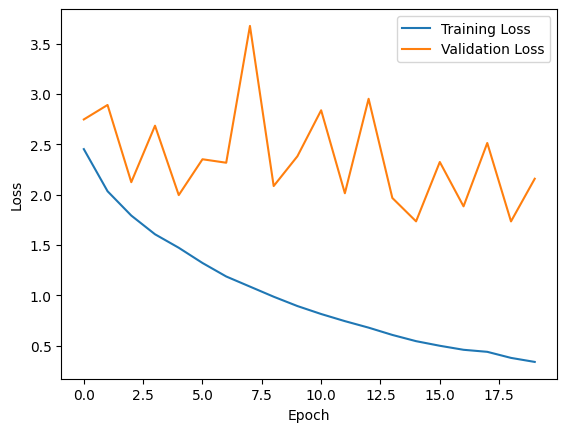

12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 260ms/step - accuracy: 0.7168 - loss: 1.1763
Test Accuracy: 0.7150395512580872
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 622ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step
Confusion Matrix:
 [[10  0  0  0  3  1  0  0  0  1  0  2  0  0  0  1  2]
 [ 1 16  0  1  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [ 1  1  9  1  0  0  0  0  0  4  0  3  0  0  0  1  0]
 [ 0  0  0 18  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [ 0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  8]
 [ 0  0  0  0  0 18  0  0  0  0  0  1  0  0  0  0  1]
 [ 1  0  0  1  2  1 17  0  0  0  0  1  0  0  1  0  0]
 [ 0  0  0  0  0 10  0 10 

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

test_loss, test_acc = model2.evaluate(test_ds)
print("Test Accuracy:", test_acc)


import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Gather all predictions and true labels
y_true = np.concatenate([y for x, y in test_ds], axis=0)
y_pred = np.concatenate([np.argmax(model2.predict(x), axis=1) for x, y in test_ds], axis=0)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

# Precision, Recall, F1
print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=test_raw.class_names))

